## TP1 Traitement du signal - Prise en main de Python pour faire du traitement du signal

## Notebook Jupyter et Python

## Quelques rappels de Python utiles pour faire du traitement du signal

### La bibliothèque numpy

La bibliothèqe [numpy](https://numpy.org/) permet de manipuler des matrices et des tableaux à n dimensions dans Python. Elle est particulièrement utilisée pour du calcul scientifique et en traitement du signal et des images. 

Les vecteurs et matrices sont des [numpy.array](https://numpy.org/doc/stable/reference/generated/numpy.array.html) de 1 et 2 dimensions. 

Quelques exemples d'opérations de base entre vecteurs et matrices sont présentées ci-dessous. 

In [1]:
import numpy as np

vect1 = np.array([1,2,3,4])
print(vect1)
print(vect1[1:3]) #vect[i:j] permet d'accéder à l'ensemble des éléments de rang i (inclus) à j (non inclus)
print()

mat1 = np.array([[1,2],[3,4]])
print(mat1)
mat2 = np.array([[4,5],[6,7]])
print(mat2[1,1]) #affichage de l'élément (1,1) soit l'élément appartenant à la deuxième ligne et la deuxième colonne
print()

mat3 = mat1 + mat2
print(mat3)
print()

mat3 = mat2-mat1
print(mat3)
print()

mat3 = mat1*mat2 #multiplication des éléments des deux matrices terme à terme
print(mat3)
print()

mat3 = mat2/mat1 #division des éléments des deux matrices terme à terme
print(mat3)
print()

mat3 = np.dot(mat1,mat2) #produit matriciel
print(mat3)
print()

[1 2 3 4]
[2 3]

[[1 2]
 [3 4]]
7

[[ 5  7]
 [ 9 11]]

[[3 3]
 [3 3]]

[[ 4 10]
 [18 28]]

[[4.   2.5 ]
 [2.   1.75]]

[[16 19]
 [36 43]]



**ACTION :** Créer une matrice A de taille 4x4 (avec numpy) que vous peuplez aléatoirement. Accéder et afficher : 
- la première ligne de A 
- la quatrième colonne de A 
- les trois premiers éléments de la quatrième ligne de A 

In [2]:
import numpy as np

A = np.random.rand(4,4) # matrice 4x4 aléatoire (loi uniforme)
print(A)
print()


# Rq1. : 1er index matrice : (0,0)
# Rq2. : (a,b) avec a indice des lignes, b indice des colonnes   
print( (A[:,3]) ) # 4e colonne de A
print()

print( (A[3, [i for i in range(0,3)] ]) ) # 3 premiers éléments de la 4e ligne de A
print()




[[0.02627366 0.40286532 0.32917473 0.7861033 ]
 [0.83129869 0.78461826 0.99052363 0.94554555]
 [0.96245586 0.66973635 0.37606776 0.78936894]
 [0.72162233 0.05480191 0.32882645 0.35951788]]

[0.7861033  0.94554555 0.78936894 0.35951788]

[0.72162233 0.05480191 0.32882645]



### La bibliothèque matplotlib

La bibliothèque [matplotlib](https://matplotlib.org/) permet de visualiser des données sous forme de graphique. Elle nous sera utile pour afficher les signaux 1D et les signaux 2D (sous forme d'image). 

**ACTION  :** L’affichage d’un vecteur se fait par l’intermédiaire de la fonction [plot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html) très utile pour obtenir des courbes de différentes fonctions planes. La commande matplotwidget permet de manipuler les figures dans le notebook. 
Tester le code dans les cellules ci-dessous. 

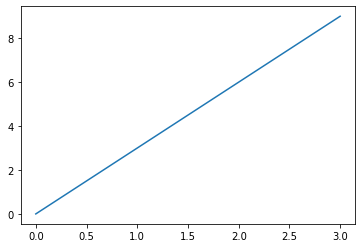

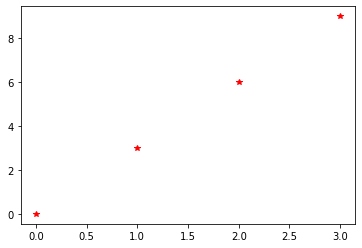

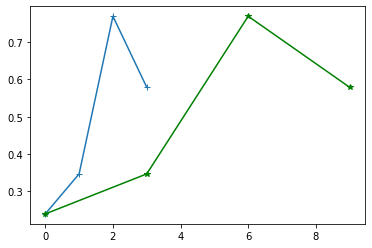

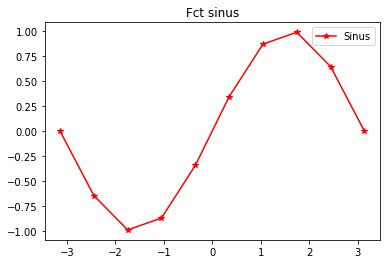

In [2]:
%matplotlib inline 

import matplotlib.pyplot as plt
import math
import numpy as np


x = np.array([i for i in range(0,10,3)]) #création d'un vecteur qui contient des éléments de 0 à 10 (non inclus) avec un pas de 3
plt.plot(x) #affichage par défaut du vecteur

plt.figure() #création d'une nouvelle figure
plt.plot(x,'r*') #affichage du vecteur en rouge avec des marqueurs "étoiles"

y = np.random.rand(4) #création d'un vecteur de taille 4 avec des éléments aléatoires compris entre 0 et 1. 

plt.figure()
plt.plot(y,'+-') #affichage du vecteur y avec la couleur par défaut, des marqueurs '+'. Les points sont reliés. 
plt.plot(x,y,'g*-') #affichage de la fonction y = f(x) en vert. Les points sont des marqueurs '*' et ils sont reliés. 
#si on ne crée pas une nouvelle figure avant de dessiner (plot), la courbe est dessinée dans la figure précédente (en superposition)

plt.figure()
z = np.linspace(-math.pi, math.pi, 10)  #on définit un vecteur entre -pi et pi avec 10 éléments
plt.plot(z, np.sin(z), 'r*-') #on calcule la fonction sinus sur ce vecteur
plt.title("Fct sinus") #on ajoute un titre à la figure
plt.legend(["Sinus"]) #on ajoute une légende


**ACTION :** L’affichage d’une matrice correspond lui à celui d’une image. Chaque élément (m, n) de la matrice est considéré comme étant la valeur du pixel (m, n) auquel il est associé. Vérifier ceci en entrant les commandes suivantes.

18729.3464393599 1.090820519374924



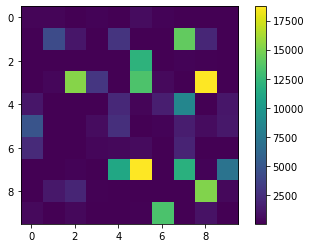

In [5]:
a = np.random.rand(10,10)*10 #matrice 10x10 avec des éléments de 0 à 10
a = np.exp(a) #pour obtenir de plus grands écarts entre les éléments de la matrice a

print(np.max(a), np.min(a)) #afficher la valeur max et min de la matrice
print()

plt.figure() #nouvelle figure
plt.imshow(a) #afficher l'image correspondant à la matrice a
plt.colorbar()

Par défaut, imshow utilse la colormap 'viridis' si la matrice est 2D. On associe généralement ce type de matrice à une image en niveau de gris. Il faut donc spécifier la colormap.

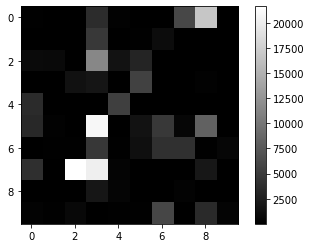

In [4]:
grey_map=plt.cm.gray #définition de la color map en niveau de gris (existe déjà dan sla bibliothèque)
plt.figure()
plt.imshow(a, grey_map) #affichage avec cette color map
plt.colorbar()

## Premiers pas en traitement du signal avec Python

### Premier signal

Un signal 1D peut être vu comme un vecteur où la durée d'observation est la taille du vecteur (nombre d'éléments).

**ACTION :** Ecrire une fonction my_impulse qui renvoie un signal impulsion avec 2 arguments en entrée, un pour définir la durée d’observation du signal, un autre pour la position de l’impulsion. Tester la fonction en affichant le résultat avec la fonction plot.

Text(0.5, 1.0, 'impulsion')

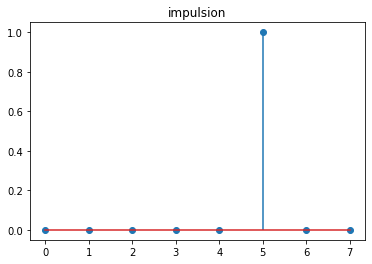

In [10]:
def my_impulse(dure, pos):
    vec = np.zeros(dure)
    vec[pos] = 1
    return vec

plt.stem(my_impulse(8,5))
plt.title("impulsion")

### Signaux sinusoïdaux

**ACTION :** Créer deux signaux sinusoïdaux de fréquence 20 Hz et 80 Hz respectivement échantillonnés à 200 Hz. L'échantillonnage est vu ici comme la durée entre deux valeurs du vecteur contenant les valeurs du signal. Dit autrement, le pas entre deux observations est 1/Fe. La durée d'observation est à définir. 
Visualiser ces deux signaux.

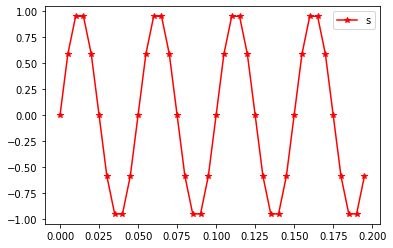

In [15]:
Fe = 200
Te = 1/Fe
n1 = np.arange(0,0.2,Te)

f1 = 20
s1 = np.sin(2*np.pi*f1*n1)
plt.figure()
plt.plot(n1,s1,'r*-')
plt.legend('s1')

f2 = 80
s2 = np.sin(2*np.pi*f2*n1)

### Analyse temporelle (échantillonnage)

**ACTION :** Conserver un échantillon sur deux pour les deux signaux, observer les deux nouveaux signaux (vous pouvez les superposer aux signaux précédents dans une autre couleur), conclure.

In [8]:
#TODO

**REPONSE :** TODO

**ACTION :** Charger les signaux stockés sous forme de vecteur dans les fichiers csv signal_inconnu et signal_inconnu2 grâce à la fonction [genfromtxt](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html) de la bibliothèque numpy. Afficher-les. 

In [9]:
#TODO

**ACTION :** Conserver un seul échantillon sur deux des deux signaux précédents et les afficher à nouveau. Utiliser la fonction [arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) pour ne conserver qu'un seul élément sur deux d'un tableau. 

In [10]:
#TODO

**ACTION :** Interpréter les courbes obtenues. Que faut-il faire avant de sous-échantillonner ? 

**REPONSE :** TODO 

**ACTION :** Charger le signal stocké dans le fichier signal_inconnu3.csv. Celui-ci contient les échantillons d’un signal bruité. On propose de filtrer ce signal avec une fenêtre ou moyenne glissante de grande taille, écrire la fonction de filtrage correspondante. Visualiser le résultat et jouer sur la taille de la fenêtre. 

In [11]:
#TODO

**Action :** Afficher la taille de ss5, h et ss6 (signal filtré). Etablir le lien entre ses tailles. Afficher ss6 en le superposant à ss5. 

**Réponse :** TODO

In [12]:
#TODO

